# Práctico 4 - Procesamiento Digital de Imágenes

In [68]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
%matplotlib inline
import math

In [69]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

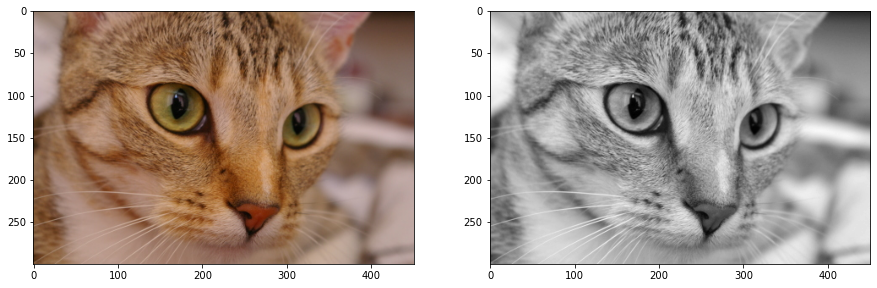

In [70]:
#Lectura la imagen en formato float
img_rgb = imageio.imread('imageio:chelsea.png').astype(float) /255
#Convertir a escala de grises según la fórmula
img_gray = rgb2gray(img_rgb)
_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img_gray,'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

Text(0.5, 1.0, 'log_center_mag')

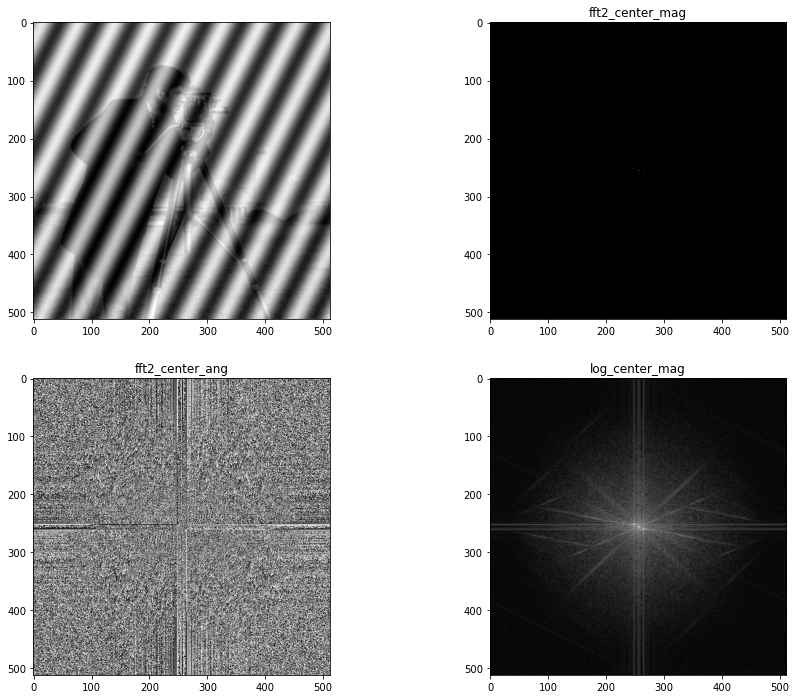

In [104]:
Img_gray = imageio.imread('../PDITARRAGA/tp4.png')/255
filas, columnas = Img_gray.shape
#Tf2D=np.fft.fft2(Imag)   Transformada de fourier en 2D
fft2 = np.fft.fft2(Img_gray)
#Tf2DCent=np.fft.fftshift(Tf)  Mover las bajas frecuencias al centro
fft2_center = np.fft.fftshift(fft2)
#Funcion Abs= np.abs() Calcula magnitud de un arreglo en espacio complejo
fft2_center_mag = np.abs(fft2_center)
#Funcion Angulo= np.ang() Calcula el angulo  de un arreglo espacio complejo
fft2_center_ang = np.angle(fft2_center)
#20*np.log10(Funcion Magnitud) Espectro en escala logaritmica
log_center_mag = 20*np.log(fft2_center_mag+1)
#N, M = img_rgb.shape
_, axes = plt.subplots(2, 2, figsize=(15,12))
axes[0,0].imshow(Img_gray,'gray')
axes[0,1].imshow(fft2_center_mag,'gray')
axes[0,1].set_title('fft2_center_mag')
axes[1,0].imshow(fft2_center_ang,'gray')
axes[1,0].set_title('fft2_center_ang')
axes[1,1].imshow(log_center_mag,'gray')
axes[1,1].set_title('log_center_mag')

## Aplicando correcion manual sobre los vectores

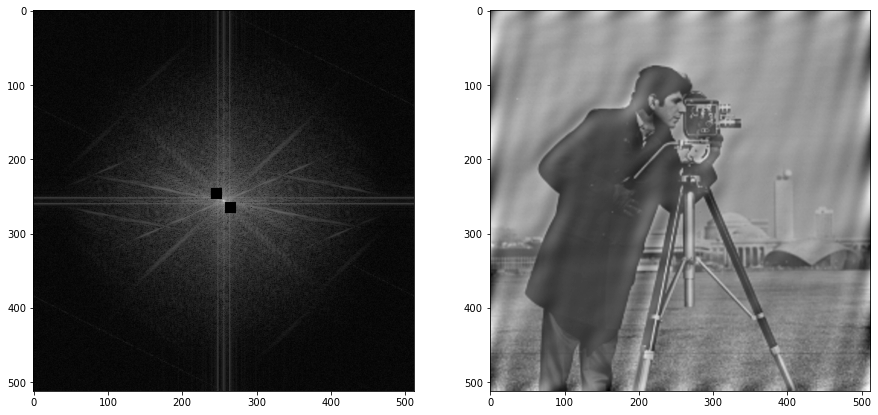

In [105]:
mFila,mCol = int(filas/2) , int(columnas/2)
#Ajuste manual se va trazar cuadrados negros de 15 puntos 
fft2_center_new=fft2_center.copy()
fft2_center_new[mFila-17:mFila-2,mCol-17:mCol-2] = 0 #Cuadrado lado izquierdo superior
fft2_center_new[mFila+2:mFila+17,mCol+2:mCol+17] = 0 #Cuadrado lado derecho inferior
#Aplicar escala logaritmica  a fft2_center_new para visualizar
log_new_mag = 20*np.log(abs(fft2_center_new)+1)
#
fft2_new = np.fft.ifftshift(fft2_center_new) #Volver a descentralizar el array corregido
#Aplicar transformada inversa
img_new = np.fft.ifft2(fft2_new)
#De la inversa solo se adquiere el modulo
img_new = np.abs(img_new)
# Graficando los resultados aplicados
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(log_new_abs,'gray')
axes[1].imshow(img_new,'gray')

# 

## Aplicando Correccion sobre imagenes capturadas

In [106]:
from matplotlib import cm  ## se llama a libreria para guardar imagen en gris
plt.imsave('log_center_mag.png',log_center_mag, cmap = cm.gray)

In [108]:
log_center_mag2 = imageio.imread('../PDITARRAGA/log_center_mag2.png')/255 # Cargando la imagen corregida

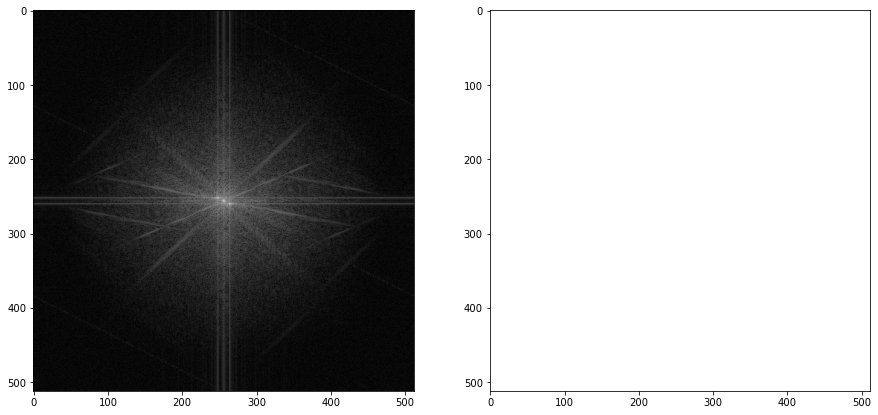

In [114]:
fft2_center_mag2=np.exp(log_center_mag2/20)-1 # Calculamos el exponencial
fft2_new2 = fft2_center_mag2*np.exp(1j*fft2_center_mag)
fft2_new2 = np.fft.ifftshift(fft2_center_new2) #Volver a descentralizar el array corregido
#Aplicar transformada inversa
img_new2 = np.fft.ifft2(fft2_new2)
#De la inversa solo se adquiere el modulo
img_new2 = np.abs(img_new2)
# Graficando los resultados aplicados
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(log_center_mag2,'gray') #Imagen corregida a mano
axes[1].imshow(img_new2,'gray')